#Projek Akhir Stechoq Tensorflow
Kelas A Kelompok 4

Projek: Klasifikasi luka bakar dengan CNN berbasis Aplikasi

Nama Anggota Kelompok:
1. Ahmad Yudhistira Fachreza Hidayat
2. Chandra Aditiya
3. Faishal Reyzally Hendriansyah
4. Mohammad Dimas Noufal
5. Rizki Muhammad Ridwan

Import Library

In [ ]:
!pip install transformers datasets evaluate huggingface_hub
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 4.8 MB/s eta

In [ ]:
%pip install torchvision

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score

In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)

TensorFlow version:  2.15.0
Keras version:  2.15.0


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammaddimasnoufal","key":"ad8b4015db053f5bc41199e8587e2594"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohammaddimasnoufal/skin-burn-dataset

Dataset URL: https://www.kaggle.com/datasets/mohammaddimasnoufal/skin-burn-dataset
License(s): unknown
 92% 146M/159M [00:01<00:00, 141MB/s]
100% 159M/159M [00:01<00:00, 113MB/s]


Import Dataset

In [ ]:
!unzip skin-burn-dataset.zip

Archive:  skin-burn-dataset.zip
  inflating: Dataset Gambar Skin Burn/First Degree Burn Superficial Thickness/img100.jpg  
  inflating: Dataset Gambar Skin Burn/First Degree Burn Superficial Thickness/img1001.jpg  
  inflating: Dataset Gambar Skin Burn/First Degree Burn Superficial Thickness/img1004.jpg  
  inflating: Dataset Gambar Skin Burn/First Degree Burn Superficial Thickness/img1004_jpg.rf.354e520c9e6eda186a160152b650e2d5.jpg  
  inflating: Dataset Gambar Skin Burn/First Degree Burn Superficial Thickness/img1004_jpg.rf.3ffdf8f945b0dba1d703355609fdf3e7.jpg  
  inflating: Dataset Gambar Skin Burn/First Degree Burn Superficial Thickness/img1004_jpg.rf.5d7fd85201c937f015c941df9838ed0a.jpg  
  inflating: Dataset Gambar Skin Burn/First Degree Burn Superficial Thickness/img1004_jpg.rf.61447222d461de8af8f09e08efcc5f2a.jpg  
  inflating: Dataset Gambar Skin Burn/First Degree Burn Superficial Thickness/img1004_jpg.rf.9a85c3d14e7abf59945d9cd82ddd76f2.jpg  
  inflating: Dataset Gambar Skin 

Labeling Dataset and Split Dataset

In [ ]:
import os
import cv2

def load_data(data_directory):
    image_names = []
    labels = []
    labels_encode = []

    for class_name in os.listdir(data_directory):
        class_path = os.path.join(data_directory, class_name)
        for filename in os.listdir(class_path):
            image = cv2.imread(os.path.join(class_path, filename))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            image_names.append(image)
            labels.append(class_name)
            if class_name == 'First Degree Burn Superficial Thickness':
                encode = 0
                labels_encode.append(encode)
            elif class_name == 'Second Degree Burn Partial of Intermediate Thickness':
                encode = 1
                labels_encode.append(encode)
            elif class_name == 'Third Degree Burn Full hickness':
                encode = 2
                labels_encode.append(encode)
            else:
                encode = 3
                labels_encode.append(encode)

    return image_names, labels, labels_encode

data_directory = 'Dataset Gambar Skin Burn'
images, labels, labelsEncode = load_data(data_directory)

In [ ]:
import numpy as np

images = np.array(images)
labels = np.array(labels)
labelsEncode = np.array(labelsEncode)

3
No Sunburn


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
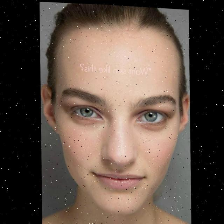

In [ ]:
print(labelsEncode[0])
print(labels[0])
images[0]

In [ ]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labelsEncode, test_size=0.2, shuffle=True, random_state=42)

Modeling

In [ ]:
from keras.applications import MobileNet
from keras.applications import MobileNetV2
from keras.applications import MobileNetV3Small
from keras.applications import MobileNetV3Large
from keras.applications import NASNetMobile
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

# base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model = MobileNet(weights= None, include_top=False, input_shape=(224, 224, 3))
# base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Menambahkan Dropout setelah Dense dengan 50% drop
model.add(Dense(64, activation='selu'))
model.add(Dropout(0.5))  # Menambahkan Dropout setelah Dense dengan 50% drop
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.layers import GlobalAveragePooling2D

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='selu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3303300 (12.60 MB)
Trainable params: 32814

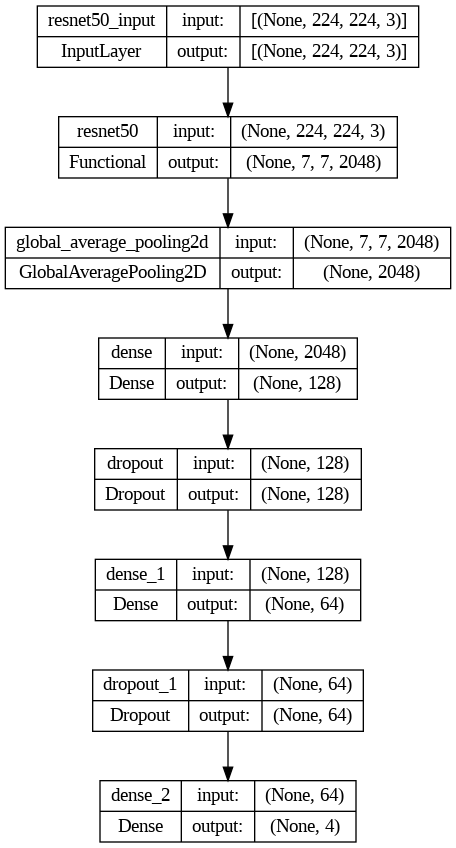

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='cnn_architecture_mobilenetv3small.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_data=(test_images, test_labels))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

In [ ]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
validation_data = (test_images, test_labels)
evaluation = model.evaluate(test_images, test_labels)
print("Evaluation loss:", evaluation[0])
print("Evaluation accuracy:", evaluation[1])

29/29 [==============================] - 183s 6s/step - loss: 1.7981 - accuracy: 0.5993
Evaluation loss: 1.7981061935424805
Evaluation accuracy: 0.5993377566337585


In [ ]:
y_pred = model.predict(test_images)

29/29 [==============================] - 153s 5s/step


1/1 [==============================] - 0s 175ms/step
ACCURACY : 0.5993377483443708
CLASSIFICATION REPORT : 
              precision    recall  f1-score   support

           0       0.44      0.99      0.61       234
           1       0.72      0.27      0.39       211
           2       0.76      0.62      0.68       218
           3       0.99      0.49      0.66       243

    accuracy                           0.60       906
   macro avg       0.73      0.59      0.58       906
weighted avg       0.73      0.60      0.59       906



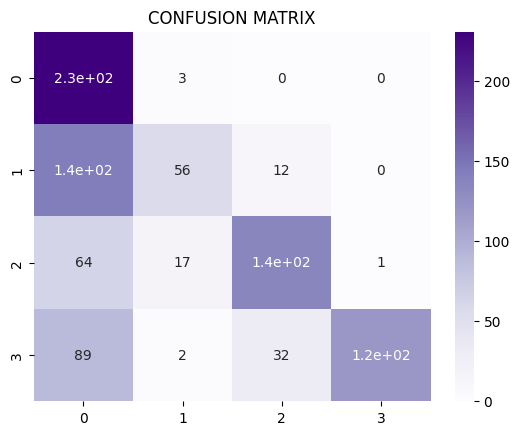

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def get_report(actual, predicted):
    print(f"ACCURACY : {accuracy_score(actual, predicted)}")
    print(f"CLASSIFICATION REPORT : \n{classification_report(actual, predicted)}")

    conf_mat = confusion_matrix(actual, predicted)

    sns.heatmap(conf_mat, annot=True, cmap='Purples')
    plt.title('CONFUSION MATRIX')
    plt.show()

def decode_species(model, test_images, test_labels):
    predicted_labels = []
    for image in test_images:
        image = np.expand_dims(image, axis=0)
        classifications = model.predict(image)  # Gunakan .predict() untuk model Keras
        predicted_label = np.argmax(classifications[0])
        predicted_labels.append(predicted_label)

    return predicted_labels

# Asumsikan model, test_images, dan test_labels sudah ada
predicted_labels = decode_species(model, test_images, test_labels)

# Panggil get_report dengan label asli dan prediksi
get_report(test_labels, predicted_labels)


In [ ]:
class_names = ["1st_degree burn", "2nd_degree burn", "3rd_degree burn", "No Sunburn",]
validation_data = (test_images, test_labels)
plt.figure(figsize=(10, 10))
for images, labels in zip(*validation_data):
    images = np.expand_dims(images, axis=0)
    classifications = model(images)

    for i in range(1):
        plt.imshow(images[i].astype("uint8"))
        predicted_label = np.argmax(classifications[i])
        true_label = int(labels)  # Assuming labels is a scalar representing the class index
        plt.title("pred: " + class_names[predicted_label] + " | Real: " + class_names[true_label])
        plt.show()  # Display each image individually

In [ ]:
model.save("mobilenet_skin_burn_dropout_classification.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("mobilenet_skin_burn_dropout_classification.tflite", 'wb') as f:
    f.write(tflite_model)

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB/s e

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2
import os

# Load the model
model = tf.keras.models.load_model('/content/mobilenet_skin_burn_classification.h5')
labels = ["1st_degree burn", "2nd_degree burn", "3rd_degree burn", "No Sunburn"]

def classify_image(image_path):
    # Read and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)

     # Predict and return the results
    prediction = model.predict(image)[0]
    predicted_label = np.argmax(prediction)
    result = labels[predicted_label]
    return {'Score': float(prediction[predicted_label]), 'Label': result}

In [ ]:
classify_image('/content/img15_jpg.rf.fa3f57a835b68f742c3b308aead083bf.jpg')

In [ ]:
import tensorflow as tf
import requests
import gradio as gr
import numpy as np
import PIL.Image as Image

model = tf.keras.models.load_model('/content/mobilenet_skin_burn_classification.h5')
labels = ["1st_degree burn", "2nd_degree burn", "3rd_degree burn", "No Sunburn"]


def resize_image_pil(img, new_width, new_height):

    # Convert to PIL image
    img = Image.fromarray(img)

    # Get original size
    width, height = img.size

    # Calculate scale
    width_scale = new_width / width
    height_scale = new_height / height
    scale = min(width_scale, height_scale)

    # Resize
    resized = img.resize((int(width*scale), int(height*scale)), Image.NEAREST)

    # Crop to exact size
    resized = resized.crop((0, 0, new_width, new_height))

    return resized

def classify_image(inp):
    img_resized = resize_image_pil(inp, 224, 224)
    arr = np.array(img_resized)
    reshaped_array = arr.reshape((-1, 224, 224, 3))
    prediction = model(reshaped_array)
    predicted_label = np.argmax(prediction)
    confidences = {labels[i]: float(prediction[i]) for i in range(1000)}
    return confidences

gr.Interface(fn=classify_image,
             inputs=gr.Image(width=224, height=224),
             outputs=gr.Label(num_top_classes=4)).launch()